# Visualizing Earning Based On College Majors

We will use a dataset on the job outcomes of students who graducated from college between 2010 and 2012.  The original data was released by American Community Survey.

The descriptions of some of the columns in the dataset is as follows:
* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

We will answer the following questions by visualizing the dataset.

* Whether or not students in more popular majors make more money
* How many majors are predominantly male of female
* Which category of majors have the most student

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
# read the dataset
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
# examine the first row in a table
recent_grads.iloc[0:1]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [4]:
# examine the first 5 rows
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
# examine the last 5 rows
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# show summary statistics for all of the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
# count the number of rows
num_rows = recent_grads.shape[0]
print ('The number of rows in the original dataset:', num_rows)

The number of rows in the original dataset: 173


In [8]:
# drop rows containing missing values
recent_grads = recent_grads.dropna()
# count the number of rows in the new dataset
num_rows_new = recent_grads.shape[0]
print('The number of rows in the new dataset:', num_rows_new)

The number of rows in the new dataset: 172


## Expore Dataset using Scatter Plots

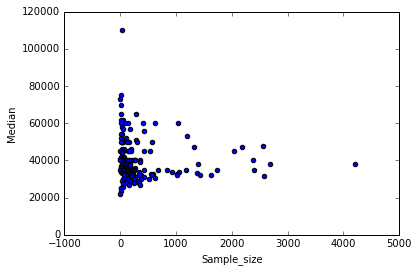

In [9]:
# Sample_size vs. Median
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

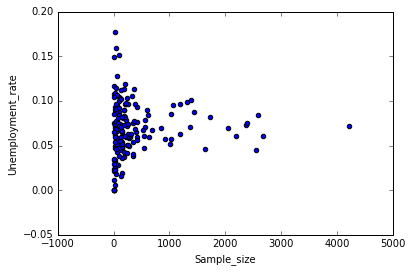

In [10]:
# Sample_size vs. Unemployment_rate
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

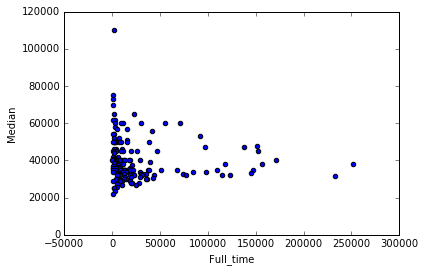

In [11]:
# Full_time vs. Median
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

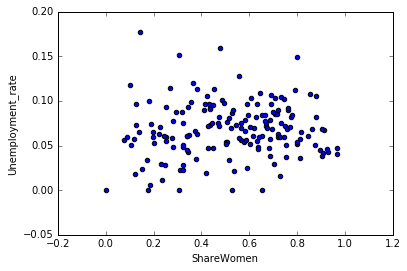

In [12]:
# ShareWomen vs. Unemployment_rate
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

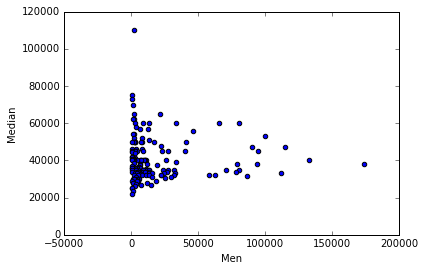

In [13]:
# Men vs. Median
recent_grads.plot(x='Men', y='Median', kind='scatter')

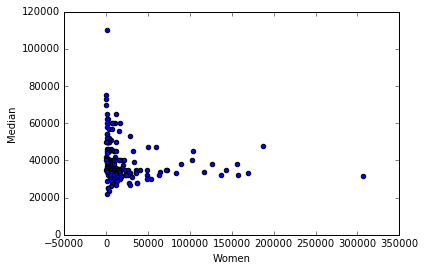

In [14]:
# Women vs. Median
recent_grads.plot(x='Women', y='Median', kind='scatter')

There are no significant relationship between the followings:

* Sample_size and Median
* Sample_size and Unemployment_rate

However, there is a high variance in each of Median and Unemployment_rate near 0 Sample_size.  The data are heavily right-skewed for the Sample_size.

* Full_time and Median
* Men and Median
* Women and Median

However, there is a high variance in Median near 0 Full_time, Men, or Women.  The data are heavily right-skewed for the Full_time, Men, or Women.

* ShareWomen and Unemployment_rate

The variances are equal at all range of Unemployment_rate and they don't influence each other in a linear sense.


    

## Exploring Dataset Using Histograms

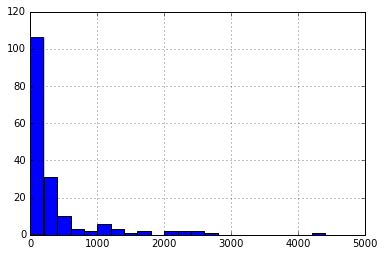

In [15]:
# histograms for Sample_size
recent_grads['Sample_size'].hist(bins=25, range=(0, 5000))

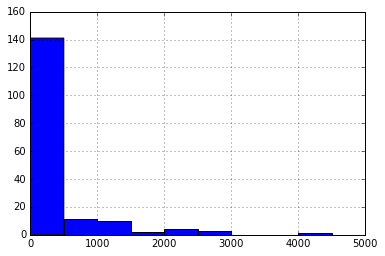

In [16]:
# histograms for Sample_size decreased bins
recent_grads['Sample_size'].hist(bins=10, range=(0, 5000))

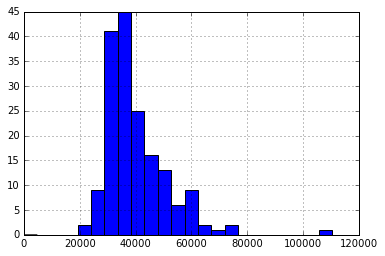

In [17]:
# histograms for Median
recent_grads['Median'].hist(bins=25, range=(0, 120000))

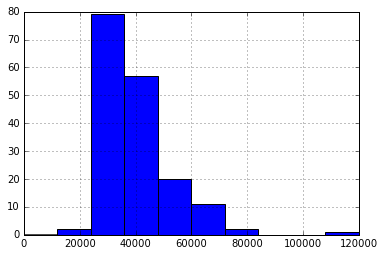

In [18]:
# histograms for Median with decreased bins
recent_grads['Median'].hist(bins=10, range=(0, 120000))

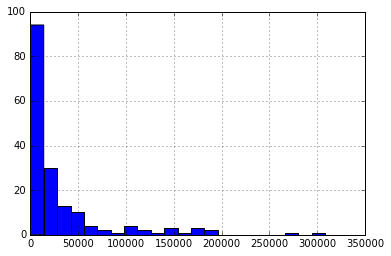

In [19]:
# histograms for Employed
recent_grads['Employed'].hist(bins=25, range=(0, 350000))

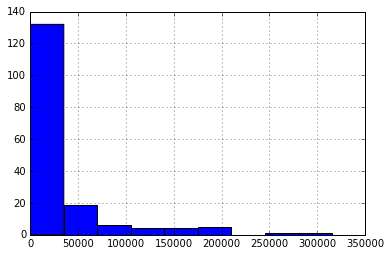

In [20]:
# histograms for Employed with decreased bins
recent_grads['Employed'].hist(bins=10, range=(0, 350000))

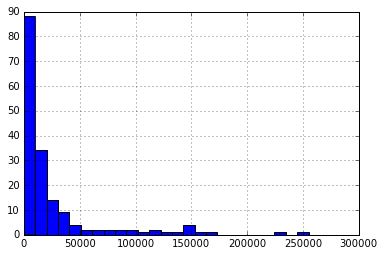

In [21]:
# histograms for Full_time
recent_grads['Full_time'].hist(bins=25, range=(0, 255000))

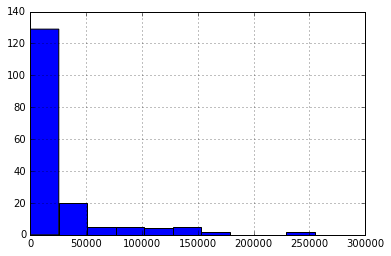

In [22]:
# histograms for Full_time with decreased bins
recent_grads['Full_time'].hist(bins=10, range=(0, 255000))

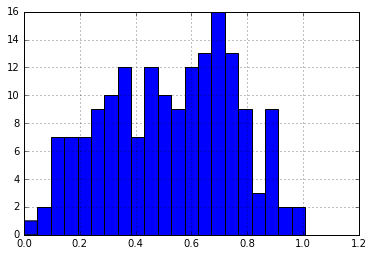

In [23]:
# histograms for ShareWomen
recent_grads['ShareWomen'].hist(bins=25, range=(0, 1.2))

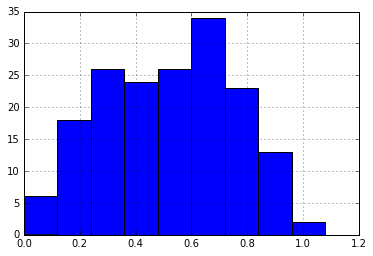

In [24]:
# histograms for ShareWomen with decreased bins
recent_grads['ShareWomen'].hist(bins=10, range=(0, 1.2))

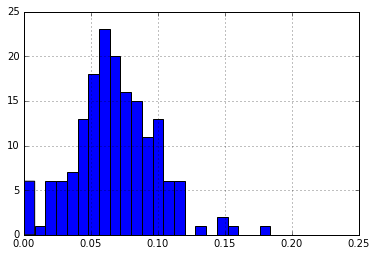

In [25]:
# histograms for Unemployment_rate
recent_grads['Unemployment_rate'].hist(bins=25, range=(0, 0.2))

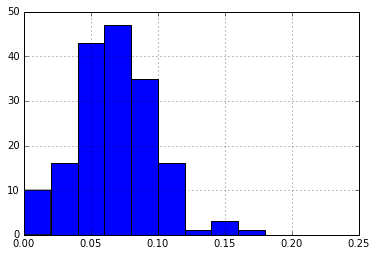

In [26]:
# histograms for Unemployment_rate with decreased rate
recent_grads['Unemployment_rate'].hist(bins=10, range=(0, 0.2))

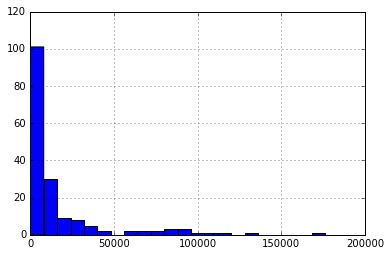

In [27]:
# histograms for Men
recent_grads['Men'].hist(bins=25, range=(0, 200000))

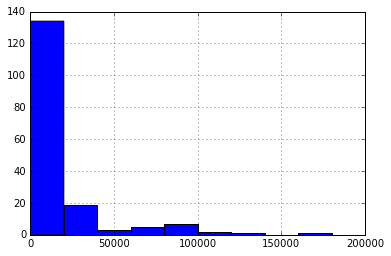

In [28]:
# histograms for Men decreased bins
recent_grads['Men'].hist(bins=10, range=(0, 200000))

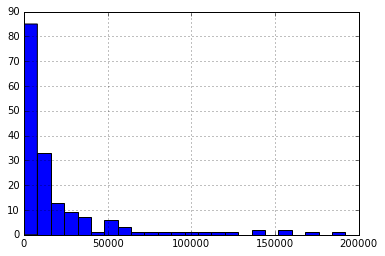

In [29]:
# histograms for Women
recent_grads['Women'].hist(bins=25, range=(0, 200000))

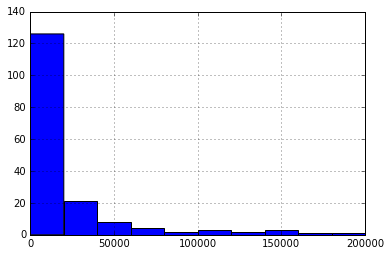

In [30]:
# histograms for Women with decreased bins
recent_grads['Women'].hist(bins=10, range=(0, 200000))

## Combining Scatter Plots and Histogram into one grid of plots by using Scatter Matrix Plot

In [31]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f633ae9f160>,
      dtype=object)

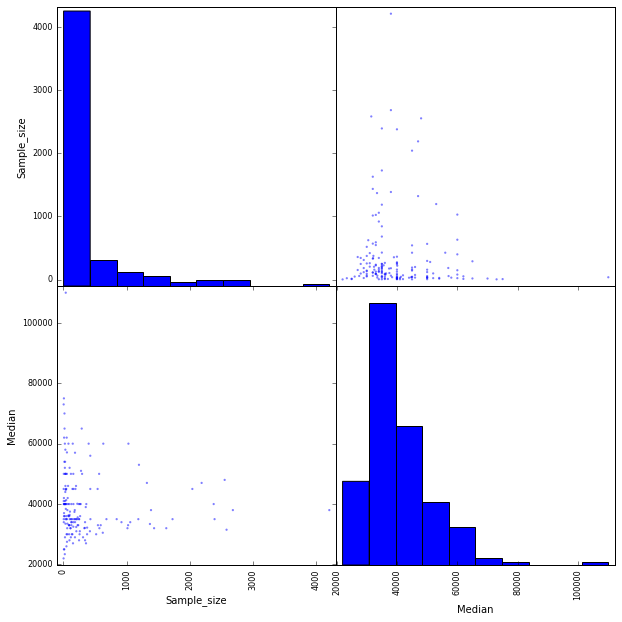

In [32]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f633ac8eda0>,
      dtype=object)

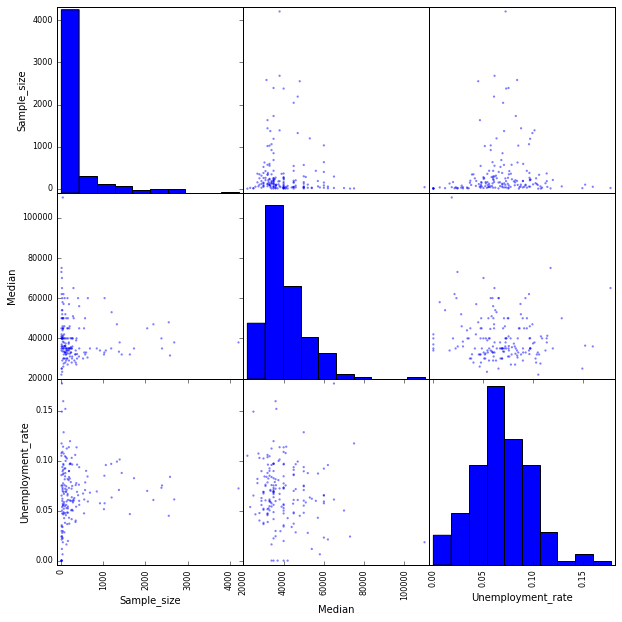

In [33]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Exploring Dataset by Using Bar Plots

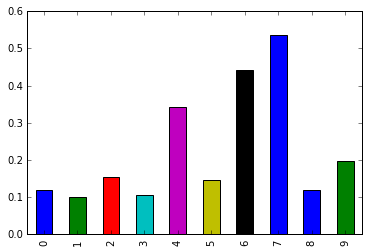

In [34]:
# compare the percentages of women from the first 10 rows
recent_grads[:10]['ShareWomen'].plot(kind='bar')

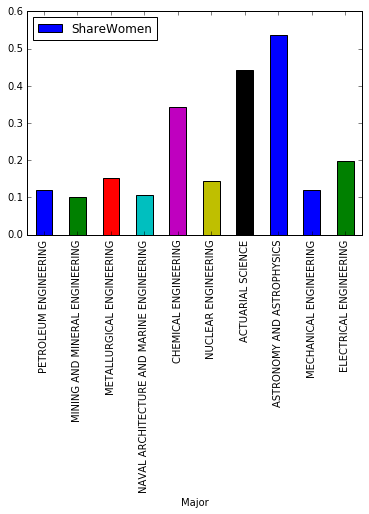

In [35]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

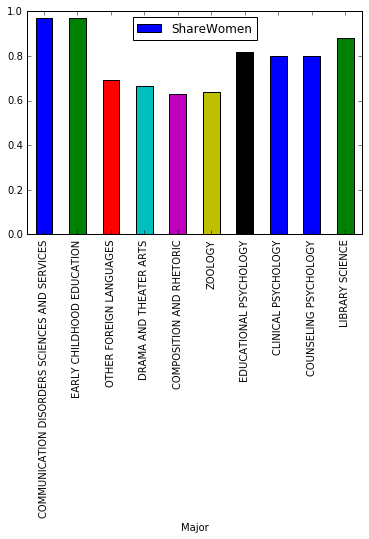

In [38]:
# compare the percentages of women from the last 10 rows
recent_grads[162:].plot.bar(x='Major', y='ShareWomen')

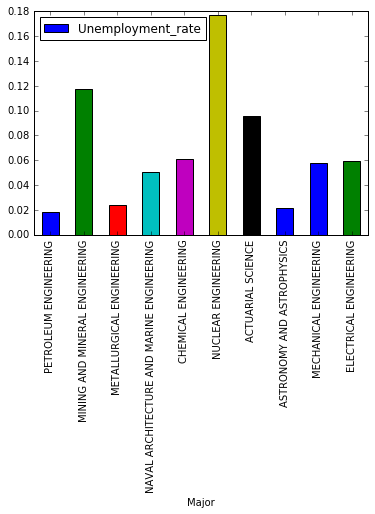

In [39]:
# compare the unemployment rate from the first 10 rows
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')

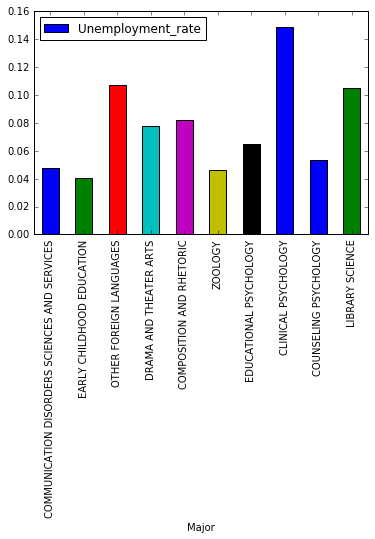

In [40]:
# compare the unemployment rate from the last 10 rows
recent_grads[162:].plot.bar(x='Major', y='Unemployment_rate')

* Based on the statistical table and the bar plot above, the highest unemployment rate was observed with the students from nuclear engineering.
* The departments that are ppopular among women seems to have lower unemployment rate, which is interesting.